In [18]:
pip install pandas numpy scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


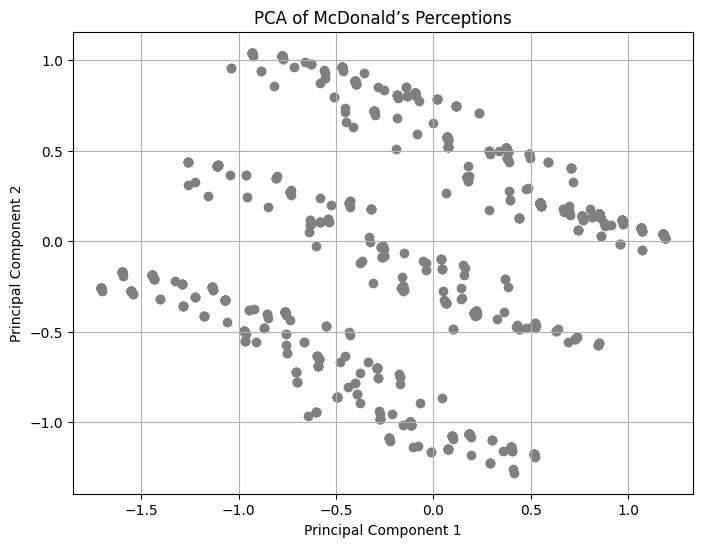

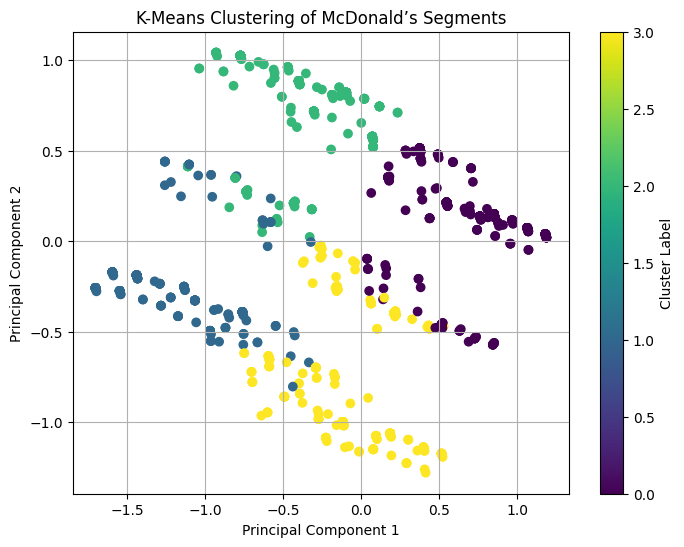

col_0    0    1    2    3
row_0                    
0      546    0    1   33
1        0  213   11    4
2       46    3  265    8
3       29   38    0  256
['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']


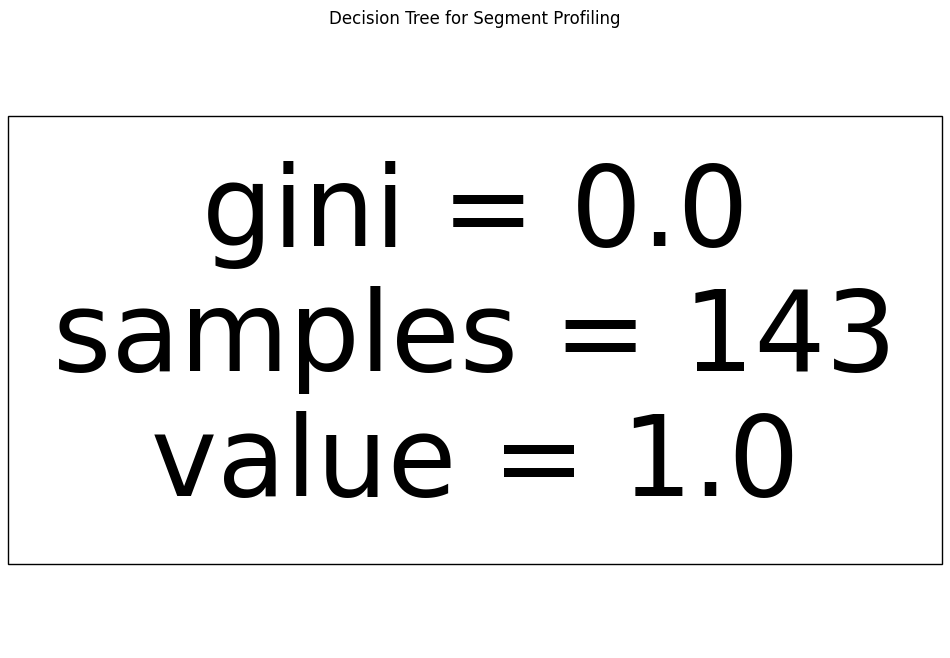

In [19]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Step 1: Load Data
data = pd.read_csv(r'C:\Users\KIIT\Downloads\mcdonalds.csv')

# Step 2: Explore Data
print(data.columns)
print(data.shape)
print(data.head(3))

# Step 3: Convert YES/NO to Binary
segmentation_vars = data.iloc[:, :11]  # First 11 columns for segmentation variables
MD_x = (segmentation_vars == "Yes").astype(int).values

# Step 4: PCA for exploring data
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.title('PCA of McDonald’s Perceptions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Step 5: K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=1234)
clusters = kmeans.fit_predict(MD_x)

# Plotting K-Means results
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering of McDonald’s Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

# Step 5.2: Gaussian Mixture Model for clustering
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm_clusters = gmm.fit_predict(MD_x)

# Cross-tabulation of K-Means and GMM clusters
cross_tab = pd.crosstab(clusters, gmm_clusters)
print(cross_tab)

# Step 6: Profiling Segments with Decision Tree (using 'Like' as dependent variable)

# Step 6.1: Inspect unique values in the 'Like' column
print(data['Like'].unique())

# Step 6.2: Clean the 'Like' column by mapping non-numeric values to numeric ones
# Example of mapping 'I love it!+5' to a high score like 5
like_mapping = {
    'I love it!+5': 5,
    'I like it+4': 4,
    'It’s okay+3': 3,
    'I dislike it+2': 2,
    'I hate it+1': 1
}

# Replace the text values with their corresponding numeric scores
data['Like_numeric'] = data['Like'].map(like_mapping)

# Step 6.3: Drop any rows with missing values after mapping
data = data.dropna(subset=['Like_numeric'])

# Step 6.4: Encoding categorical variables 'Gender' and 'VisitFrequency'
X = data[['Age', 'VisitFrequency', 'Gender']]

# One-hot encode 'Gender' and 'VisitFrequency'
X = pd.get_dummies(X, columns=['Gender', 'VisitFrequency'], drop_first=True)

# Set the target variable
y = data['Like_numeric']

# Step 6.5: Fit the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=1234)
tree_model.fit(X, y)

# Plotting the decision tree
plt.figure(figsize=(12,8))
plot_tree(tree_model, filled=True)
plt.title('Decision Tree for Segment Profiling')
plt.show()


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


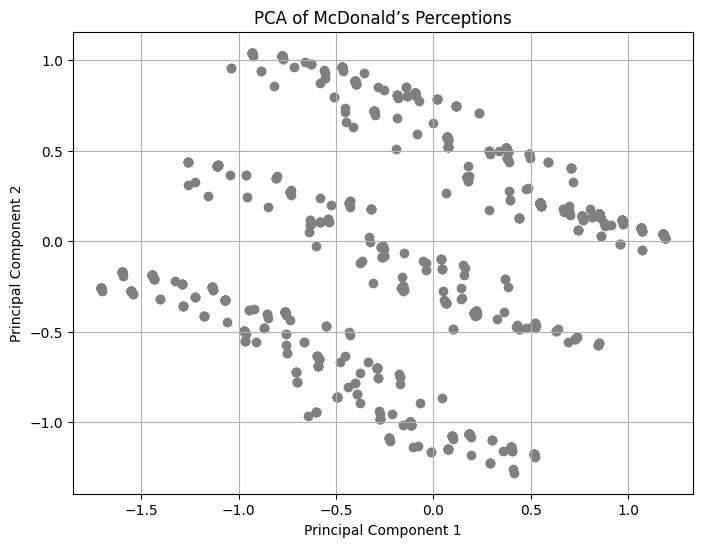

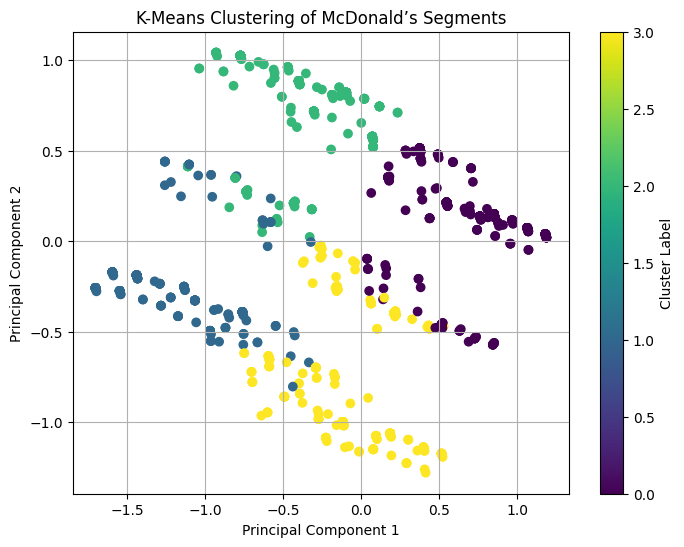

col_0    0    1    2    3
row_0                    
0      546    0    1   33
1        0  213   11    4
2       46    3  265    8
3       29   38    0  256


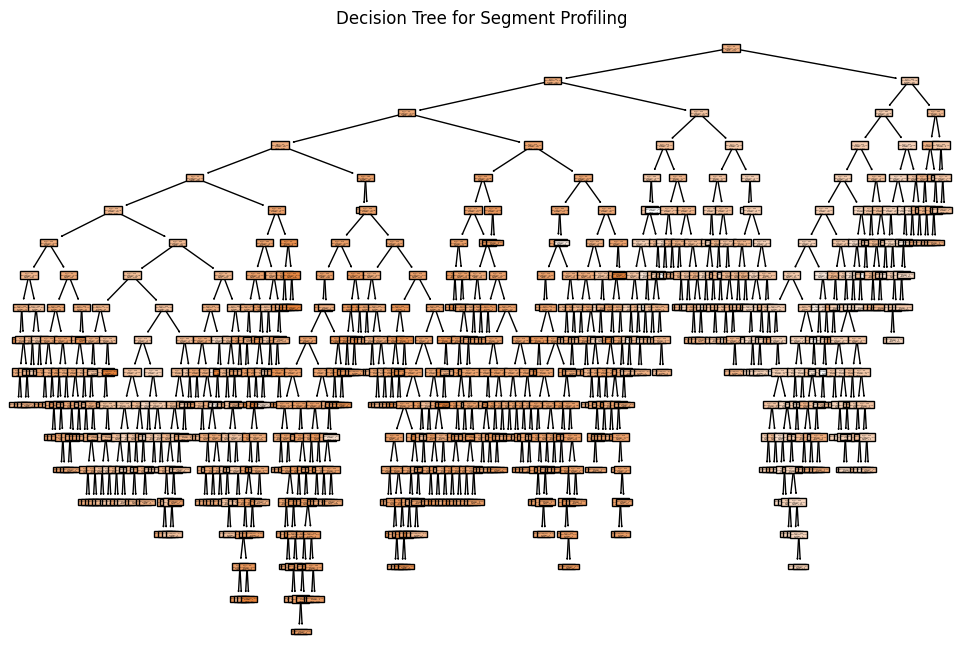

Description of K-Means Clusters:
                      Age  Like_numeric  KMeans_Cluster  GMM_Cluster
KMeans_Cluster                                                      
0               43.470690      2.026592             0.0     0.174138
1               48.087719     -0.442278             1.0     1.083333
2               48.990683     -0.457096             2.0     1.729814
3               39.811146      1.689403             3.0     2.495356

Description of GMM Clusters:
                   Age  Like_numeric  KMeans_Cluster  GMM_Cluster
GMM_Cluster                                                      
0            43.570048      1.862106        0.288245          0.0
1            48.374016     -0.286987        1.311024          1.0
2            49.357401     -0.516613        1.953069          2.0
3            39.186047      1.769783        2.617940          3.0

Target Segment based on satisfaction:
                     Age  Like_numeric  KMeans_Cluster  GMM_Cluster
KMeans_Cluster      

In [20]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Step 1: Load Data
data = pd.read_csv(r'C:\Users\KIIT\Downloads\mcdonalds.csv')

# Step 2: Explore Data
print(data.columns)
print(data.shape)
print(data.head(3))

# Step 3: Convert YES/NO to Binary
segmentation_vars = data.iloc[:, :11]  # First 11 columns for segmentation variables
MD_x = (segmentation_vars == "Yes").astype(int).values

# Step 4: PCA for exploring data
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.title('PCA of McDonald’s Perceptions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Step 5: K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=1234)
clusters = kmeans.fit_predict(MD_x)

# Plotting K-Means results
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering of McDonald’s Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

# Step 5.2: Gaussian Mixture Model for clustering
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm_clusters = gmm.fit_predict(MD_x)

# Cross-tabulation of K-Means and GMM clusters
cross_tab = pd.crosstab(clusters, gmm_clusters)
print(cross_tab)

# Step 6: Profiling Segments with Decision Tree Regressor (using 'Like' as dependent variable)
# First, handle 'Like' column conversion and missing values
data['Like_numeric'] = pd.to_numeric(data['Like'], errors='coerce')
data['Like_numeric'] = data['Like_numeric'].fillna(data['Like_numeric'].mean())  # Handle missing values by filling with the mean

# Features (Age, VisitFrequency, Gender) and target (Like_numeric)
X = data[['Age', 'VisitFrequency', 'Gender']]
y = data['Like_numeric']

# Encoding categorical variable 'Gender' and 'VisitFrequency'
X = pd.get_dummies(X, columns=['Gender', 'VisitFrequency'], drop_first=True)

# Use DecisionTreeRegressor instead of DecisionTreeClassifier
tree_model = DecisionTreeRegressor(random_state=1234)
tree_model.fit(X, y)

# Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True)
plt.title('Decision Tree for Segment Profiling')
plt.show()

# Step 7: Describing Segments
# Add the cluster labels back to the original data
data['KMeans_Cluster'] = clusters
data['GMM_Cluster'] = gmm_clusters

# Describing segments based on K-Means clusters
# Only keep numeric columns for aggregation
numeric_columns = data.select_dtypes(include=[np.number]).columns
kmeans_description = data.groupby('KMeans_Cluster')[numeric_columns].mean()
print("Description of K-Means Clusters:")
print(kmeans_description)

# Describing segments based on GMM clusters
gmm_description = data.groupby('GMM_Cluster')[numeric_columns].mean()
print("\nDescription of GMM Clusters:")
print(gmm_description)

# Step 8: Selecting Target Segment(s)
# Example: Choosing KMeans_Cluster with the highest satisfaction score ('Like_numeric')
target_segment = kmeans_description[kmeans_description['Like_numeric'] == kmeans_description['Like_numeric'].max()]
print("\nTarget Segment based on satisfaction:")
print(target_segment)

# Step 9: Customizing the Marketing Mix
print("\nCustomizing the Marketing Mix for the Target Segment:")
print("Product: Enhance the offerings that appeal to their 'Like' ratings.")
print("Price: Consider premium pricing for customers who visit more frequently and rate the brand highly.")
print("Place: Focus on regions with a high density of this segment.")
print("Promotion: Use digital channels with personalized offers to appeal to this demographic.")

# Step 10: Evaluation and Monitoring
print("\nEvaluation and Monitoring:")
print("KPI 1: Track the sales increase in the target segment post-marketing campaign.")
print("KPI 2: Measure improvement in 'Like' scores in follow-up surveys.")
print("KPI 3: Calculate the return on marketing investment (ROMI) after implementation.")
